In [1]:
#import useful Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import r2_score

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [2]:
#importing custom functions file
import sys
if '/content/drive/MyDrive/datamininglabs/Functions' not in sys.path:
  sys.path.append('/content/drive/MyDrive/datamininglabs/Functions')

In [3]:
import function as fun

In [4]:
file_path = '/content/drive/MyDrive/datamininglabs/lab2'

## **Loading CSV file**

In [5]:
df = pd.read_csv(file_path + '/allheart.csv')
df.head(3)

,age,sex,pain,bpress,chol,bsugar,ekg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1


In [6]:
df.shape #data from shape(rows, columns)

(303, 14)

In [7]:
fun.metadata(df) #data distribution/description

,column_name,datatype,missing_percent,unique,mean,std,min,25%,50%,75%,max
0,age,int64,0.00,41,54.438944,9.038662,29.0,48.0,56.0,61.0,77.0
1,sex,int64,0.00,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,pain,int64,0.00,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,bpress,int64,0.00,50,131.689769,17.599748,94.0,120.0,130.0,140.0,200.0
4,chol,int64,0.00,152,246.693069,51.776918,126.0,211.0,241.0,275.0,564.0
5,bsugar,int64,0.00,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,ekg,int64,0.00,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,thalach,int64,0.00,91,149.607261,22.875003,71.0,133.5,153.0,166.0,202.0
8,exang,int64,0.00,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,oldpeak,float64,0.00,40,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


## Data Dictionary
age - age in years<br>
bpress - resting blood pressure<br>
bsugar - fasting blood sugar> 120mg/dl<br>
ca - number of major blood vessels (0-3)<br>
chol - serum cholesterol in mg/dl<br>
ekg - resting electrocardiographic results (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)<br>
exang - Exercise-induced agina(1:yes, 0:no)
oldpeak - ST depression induced by exercise related to rest<br>
pain - chest pain type (1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic)<br>
sex -  sex(1:male, 0:female)<br>
slope - slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)<br>
target - number of blood vessela(0-4) reduced in diameter by more than 50%<br>
thal - A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)<br>
thalac - Maximum heart rate achieved

## **Exploring the columns in data set**

there is no outlier ofage.
------------------Box plot---------------------


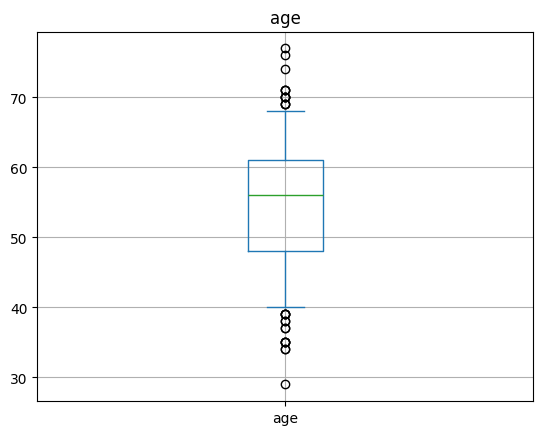

-----------------Distribution plot-----------------


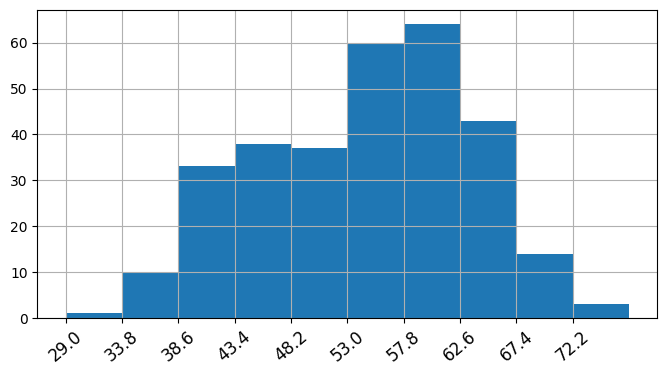

there is no outlier ofsex.
------------------Box plot---------------------


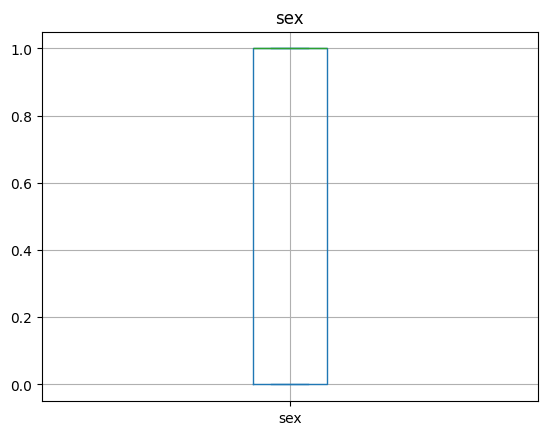

there is no outlier ofpain.
------------------Box plot---------------------


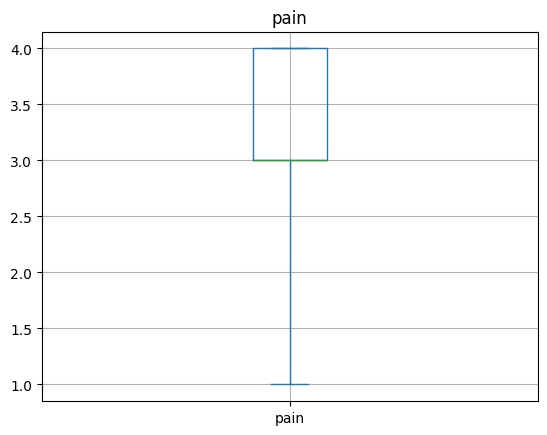

there are2  of outliers for bpress.
[200, 192]
------------------Box plot---------------------


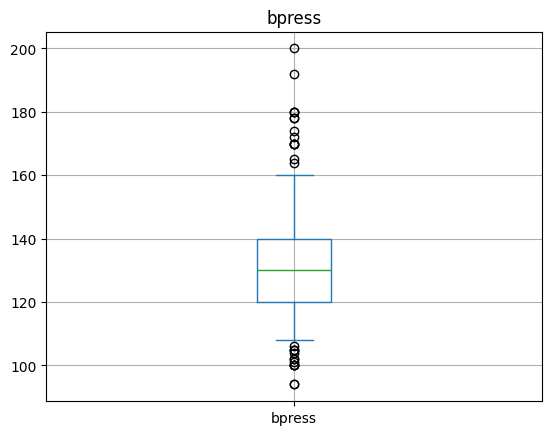

-----------------Distribution plot-----------------


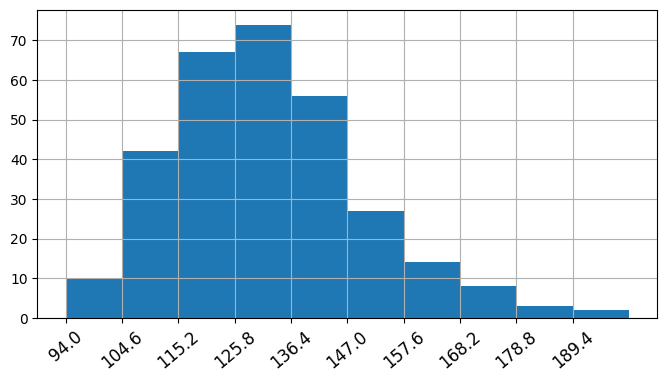

there are4  of outliers for chol.
[417, 407, 564, 409]
------------------Box plot---------------------


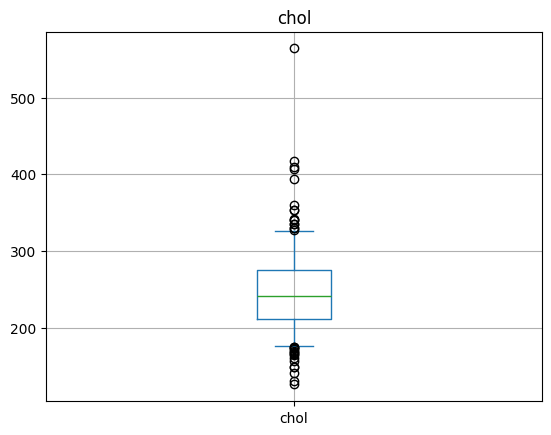

-----------------Distribution plot-----------------


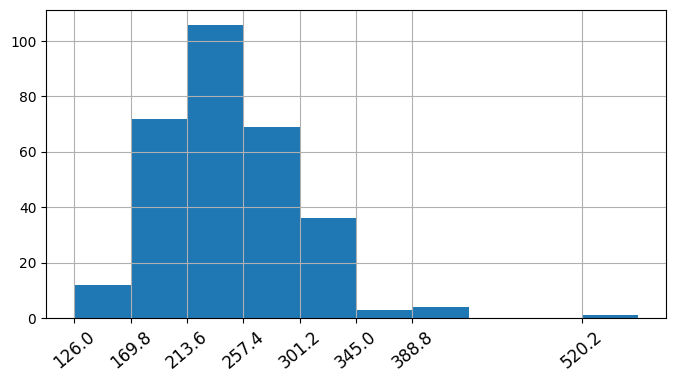

there is no outlier ofbsugar.
------------------Box plot---------------------


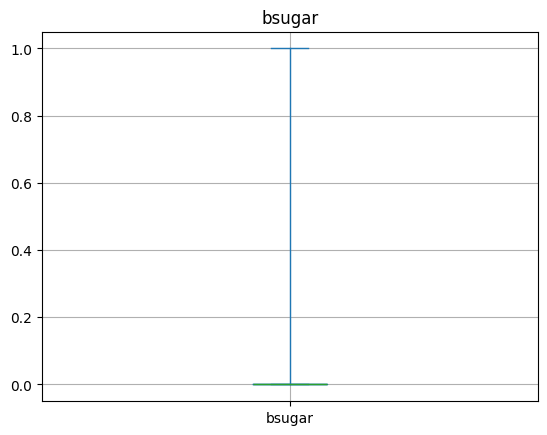

there is no outlier ofekg.
------------------Box plot---------------------


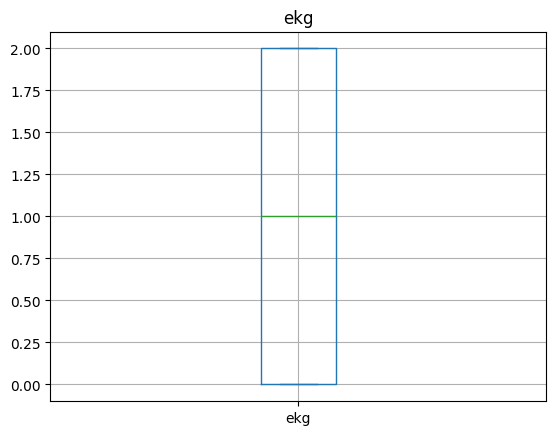

there are1  of outliers for thalach.
[71]
------------------Box plot---------------------


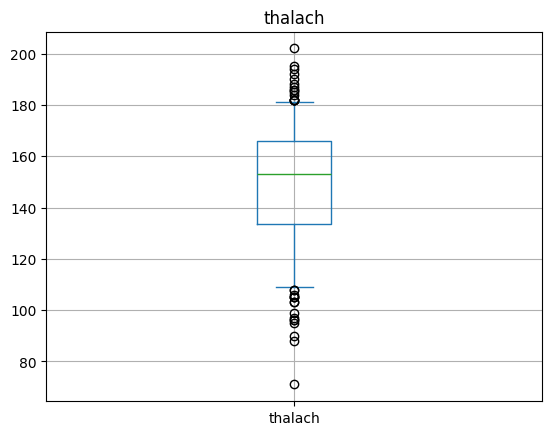

-----------------Distribution plot-----------------


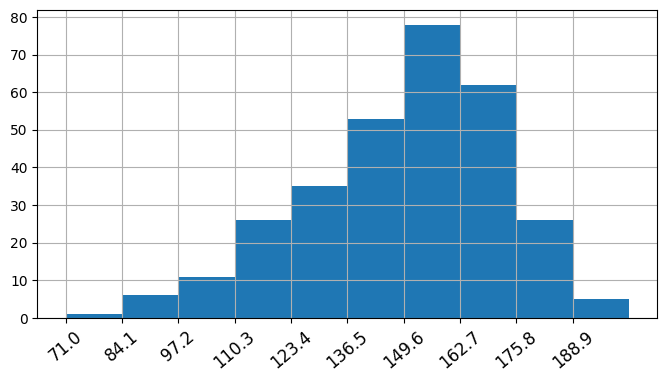

there is no outlier ofexang.
------------------Box plot---------------------


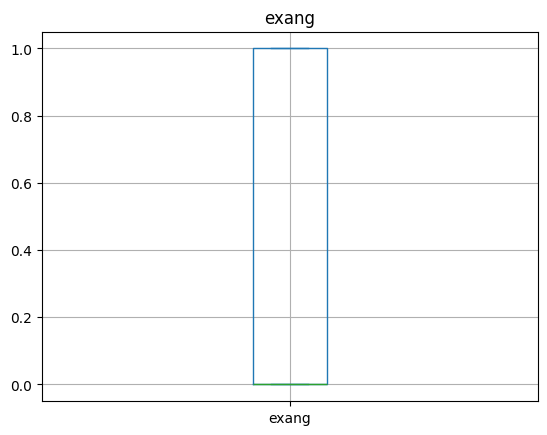

there are2  of outliers for oldpeak.
[6.2, 5.6]
------------------Box plot---------------------


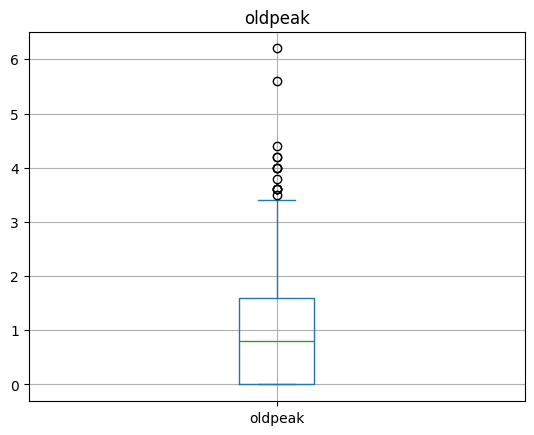

-----------------Distribution plot-----------------


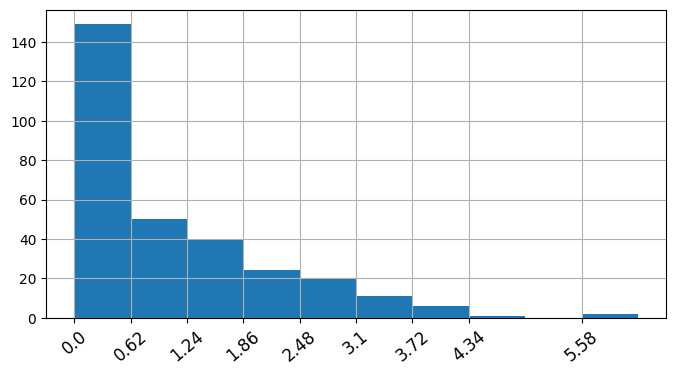

there is no outlier ofslope.
------------------Box plot---------------------


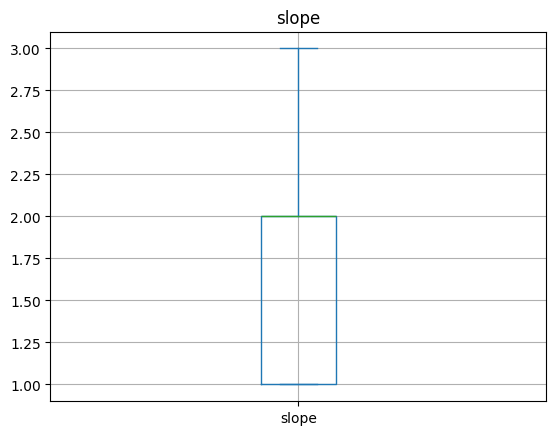

there is no outlier ofca.
------------------Box plot---------------------


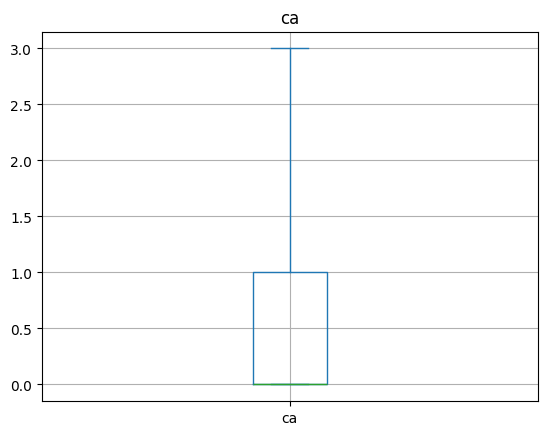

there is no outlier ofthal.
------------------Box plot---------------------


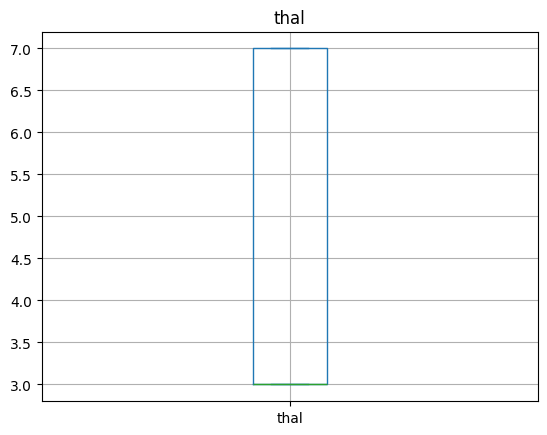

there is no outlier oftarget.
------------------Box plot---------------------


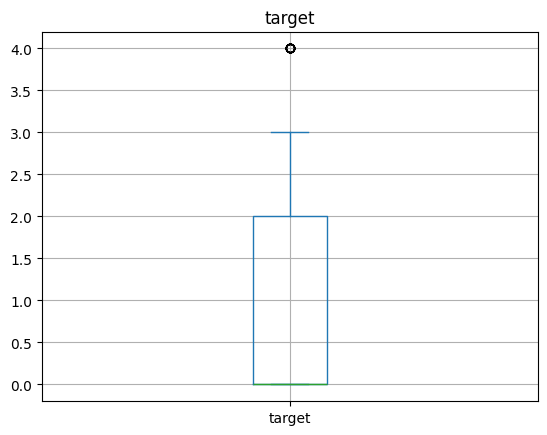

In [8]:
for column in df.columns:
  fun.data_exploration(df, column)

## Feature correlation heatmap in relationship to target variable

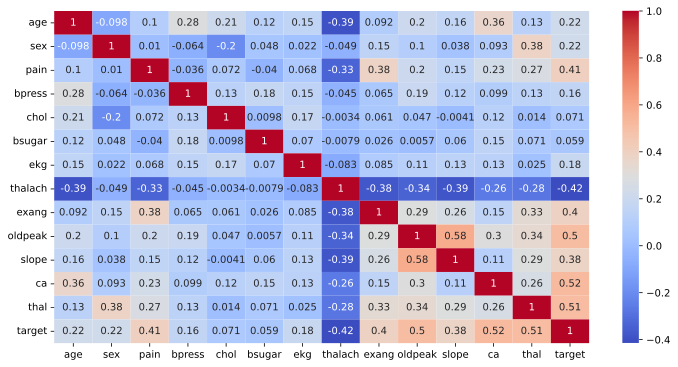

In [9]:
import seaborn as sns
%config InlineBackend.figure_format = "svg"

df_correlation = df
df_columns = list(df.columns)
plt.figure(figsize=(12,6))
g= sns.heatmap(df_correlation[df_columns].corr(), annot=True, cmap= 'coolwarm')

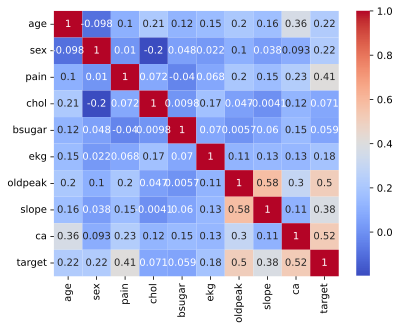

In [10]:

df_correlation = df
df_correlation ['target']=df_correlation['target'].astype('float')
g = sns.heatmap(df_correlation[['age', 'sex', 'pain', 'chol', 'bsugar', 'ekg', 'oldpeak', 'slope', 'ca' ,'target']].corr(),
                annot=True, cmap = 'coolwarm')

## **Encoding columns to Categorical for model efficiency**

In [13]:
df['ekg'] = df['ekg'].astype('category')
df['pain'] = df['pain'].astype('category')
df['thal'] = df['thal'].astype('category')
df['bsugar'] = df['bsugar'].astype('category')
df['exang'] = df['exang'].astype('category')
df['sex'] = df['sex'].astype('category')

In [ ]:
df['target'] = df['sex'].astype('category')

   target  counts  %count
0     0.0     164   54.13
1     1.0      55   18.15
2     2.0      36   11.88
3     3.0      35   11.55
4     4.0      13    4.29


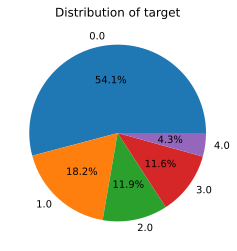

In [11]:
fun.pie_cate(df, 'target') #target feature distribution

## **Improving target using Equal frequency bins and transforming to ordinal**

In [12]:
# from sklearn.preprocessing import KBinsDiscretizer
# est = KBinsDiscretizer(n_bins = 3, encode='ordinal', strategy='quantile')
# df['Target_Bins'] = est.fit_transform(df[['target']])

# df[['target', 'Target_Bins']].head()

/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_discretization.py:306: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  warnings.warn(


,target,Target_Bins
0,0.0,0.0
1,2.0,1.0
2,1.0,1.0
3,0.0,0.0
4,0.0,0.0


   Target_Bins  counts  %count
0          0.0     164   54.13
1          1.0     139   45.87


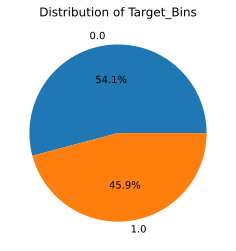

In [14]:
fun.pie_cate(df, 'Target_Bins')

### Considering the data didtribution, changing target distribution for improved model performance

In [28]:
df['target_bins'] = df['target'].replace({
    1.0: 1.0,
    2.0: 1.0,
    3.0: 2.0,
    4.0: 2.0
})

In [16]:
df['sex'] = df['sex'].astype('category')

In [30]:
df['target_bins'] = df['target_bins'].astype('category')


In [18]:
df.shape

(303, 16)

  target_bins  counts  %count
0         0.0     160   53.87
1         1.0      89   29.97
2         2.0      48   16.16


/content/drive/MyDrive/datamininglabs/Functions/function.py:29: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count_value = df.groupby([column]).size().reset_index(name ='counts')


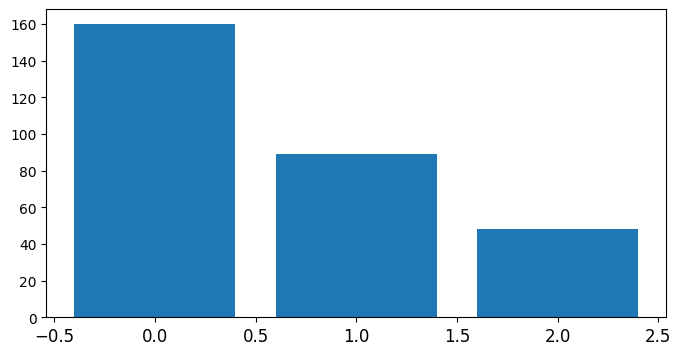

In [31]:
fun.data_exploration(df, 'target_bins')

In [32]:
df['target_bins'] = df['target_bins'].astype('int64')

In [ ]:
# df.drop(['Target_Bins'], axis= 1, inplace=True)

In [22]:
print(fun.metadata(df))

    column_name  datatype  missing_percent  unique        mean        std  \
0           age     int64             0.00      41   54.438944   9.038662   
1           sex  category             0.00       2         NaN        NaN   
2          pain  category             0.00       4         NaN        NaN   
3        bpress     int64             0.00      50  131.689769  17.599748   
4          chol     int64             0.00     152  246.693069  51.776918   
5        bsugar  category             0.00       2         NaN        NaN   
6           ekg  category             0.00       3         NaN        NaN   
7       thalach     int64             0.00      91  149.607261  22.875003   
8         exang  category             0.00       2         NaN        NaN   
9       oldpeak   float64             0.00      40    1.039604   1.161075   
10        slope     int64             0.00       3         NaN        NaN   
11           ca   float64             1.32       4         NaN        NaN   

## **Data preparation: Handling missing Values before training and tests splits occur**

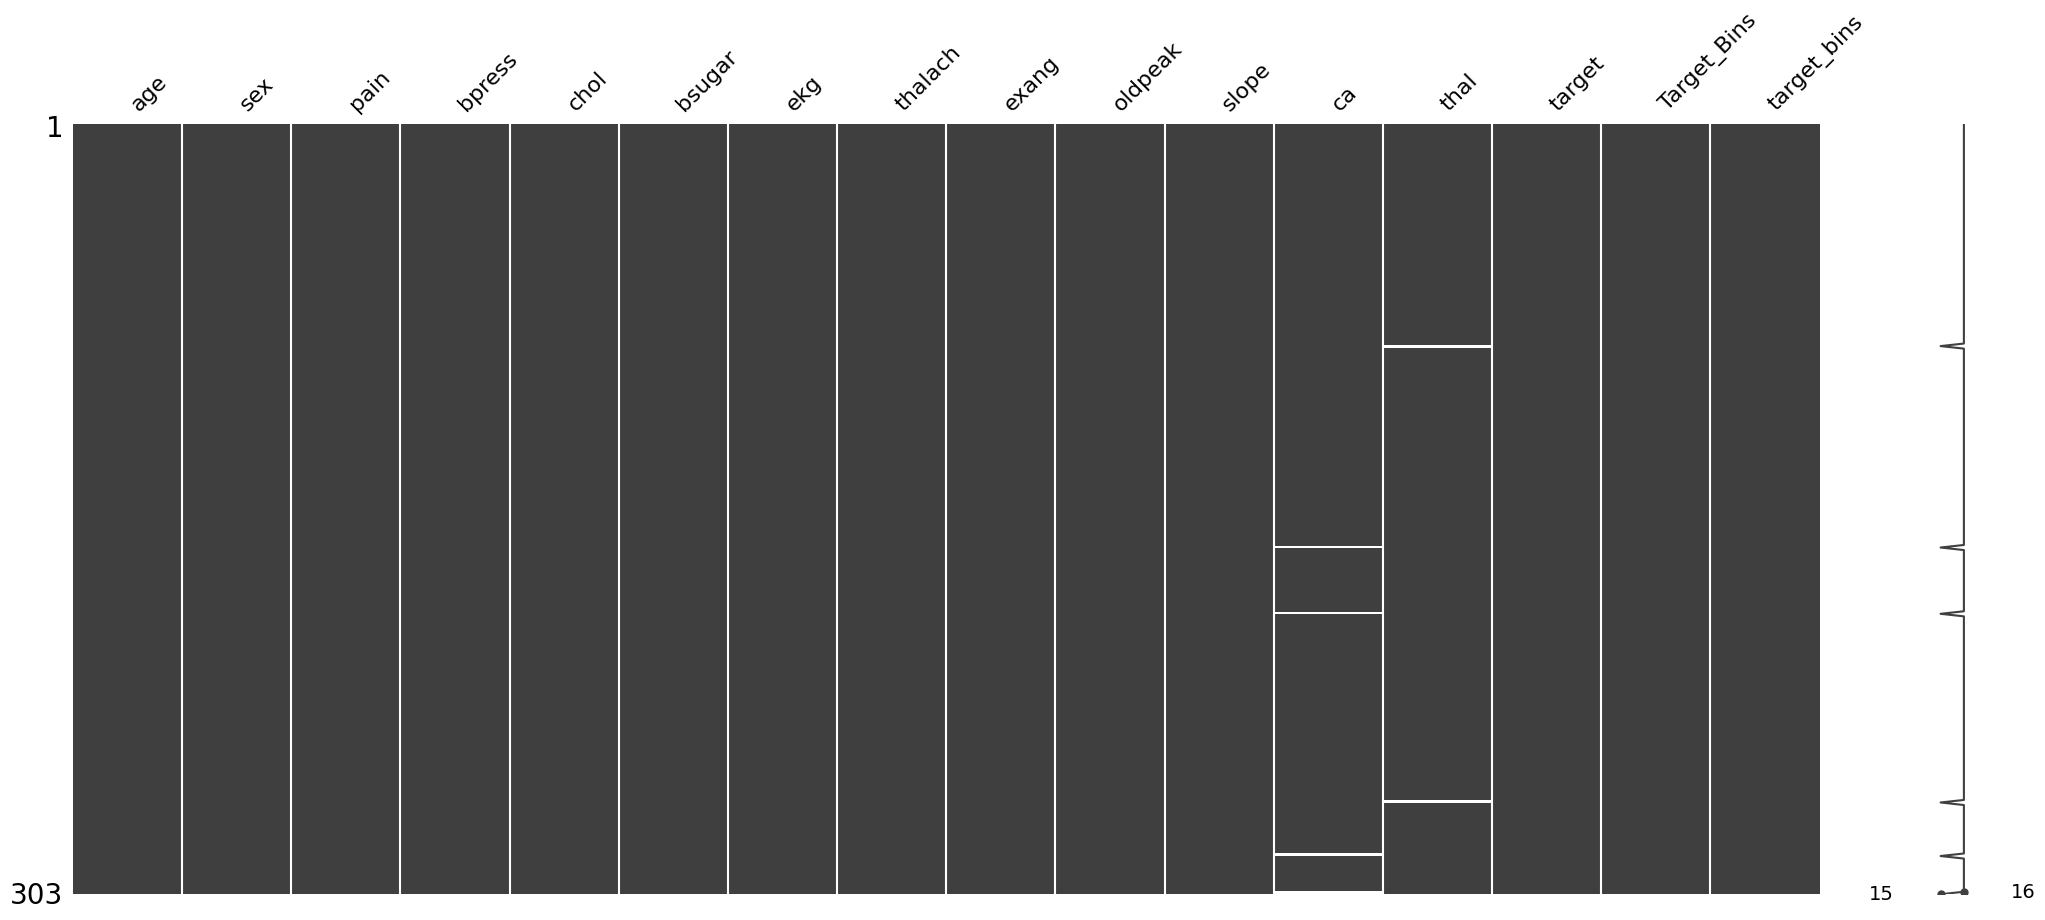

In [23]:
import missingno as msno
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'png'

msno.matrix(df)
plt.show()

In [33]:
df.dropna(how='any', inplace=True)

df.isnull().sum()

,0
age,0
sex,0
pain,0
bpress,0
chol,0
bsugar,0
ekg,0
thalach,0
exang,0
oldpeak,0


In [34]:
print(fun.metadata(df))

    column_name  datatype  missing_percent  unique        mean        std  \
0           age     int64              0.0      41   54.542088   9.049736   
1           sex  category              0.0       2         NaN        NaN   
2          pain  category              0.0       4         NaN        NaN   
3        bpress     int64              0.0      50  131.693603  17.762806   
4          chol     int64              0.0     152  247.350168  51.997583   
5        bsugar  category              0.0       2         NaN        NaN   
6           ekg  category              0.0       3         NaN        NaN   
7       thalach     int64              0.0      91  149.599327  22.941562   
8         exang  category              0.0       2         NaN        NaN   
9       oldpeak   float64              0.0      40    1.055556   1.166123   
10        slope     int64              0.0       3         NaN        NaN   
11           ca   float64              0.0       4         NaN        NaN   

In [37]:
df_model = df.drop(['sex', 'age', 'bsugar', 'ekg', 'chol'], axis=1)

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
import sklearn
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, roc_curve, precision_recall_curve, auc, make_scorer, recall_score, accuracy_score, precision_score, confusion_matrix

In [35]:
from sklearn.tree import DecisionTreeRegressor

In [38]:
X_train_rt, X_test_rt, y_train_rt, y_test_rt = train_test_split(df_model.drop(['target', 'Target_Bins', 'target_bins'], axis=1),
                                                                df_model["target_bins"],
                                                                test_size=0.3, random_state=101)
# X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3
print('The length of training set:', len(X_train_rt))
print('The length of testing set:', len(X_test_rt))

The length of training set: 207
The length of testing set: 90


### **Regression Trees using squared & absolute error**

In [41]:
se_sqerr_RT =DecisionTreeRegressor(criterion='squared_error', random_state=100, max_depth = 3, min_samples_leaf= int(len(X_train_rt)*0.03))
se_sqerr_RT = se_sqerr_RT.fit(X_train_rt, y_train_rt)

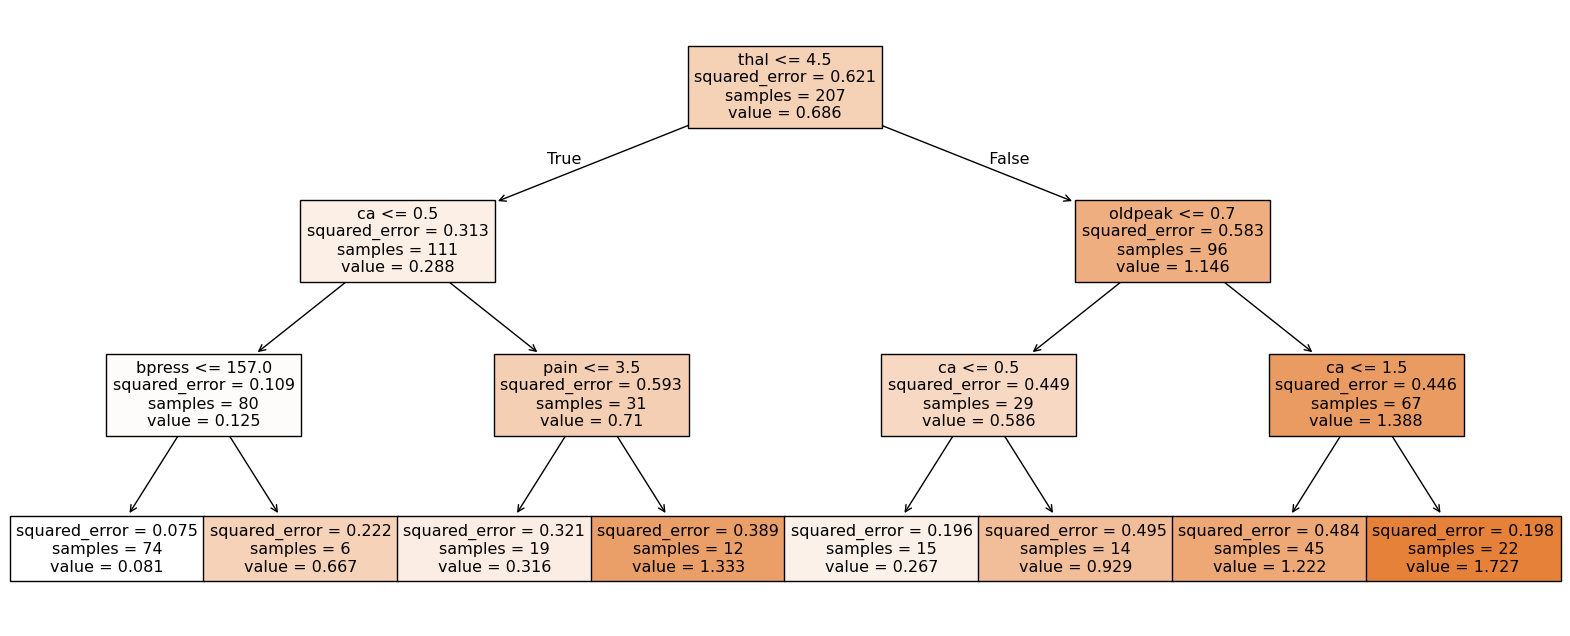

In [44]:
from sklearn import tree

X = df_model.drop(['target', 'Target_Bins', 'target_bins'], axis=1)
fn= X.columns
cn=['0','1','2']

fig = plt.figure(figsize=(20,8))
_ = tree.plot_tree(se_sqerr_RT, feature_names = fn, filled=True)

In [43]:
se_abserr_RT =DecisionTreeRegressor(criterion='absolute_error', random_state=100, max_depth = 3, min_samples_leaf= int(len(X_train_rt)*0.03))
se_abserr_RT = se_abserr_RT.fit(X_train_rt, y_train_rt)

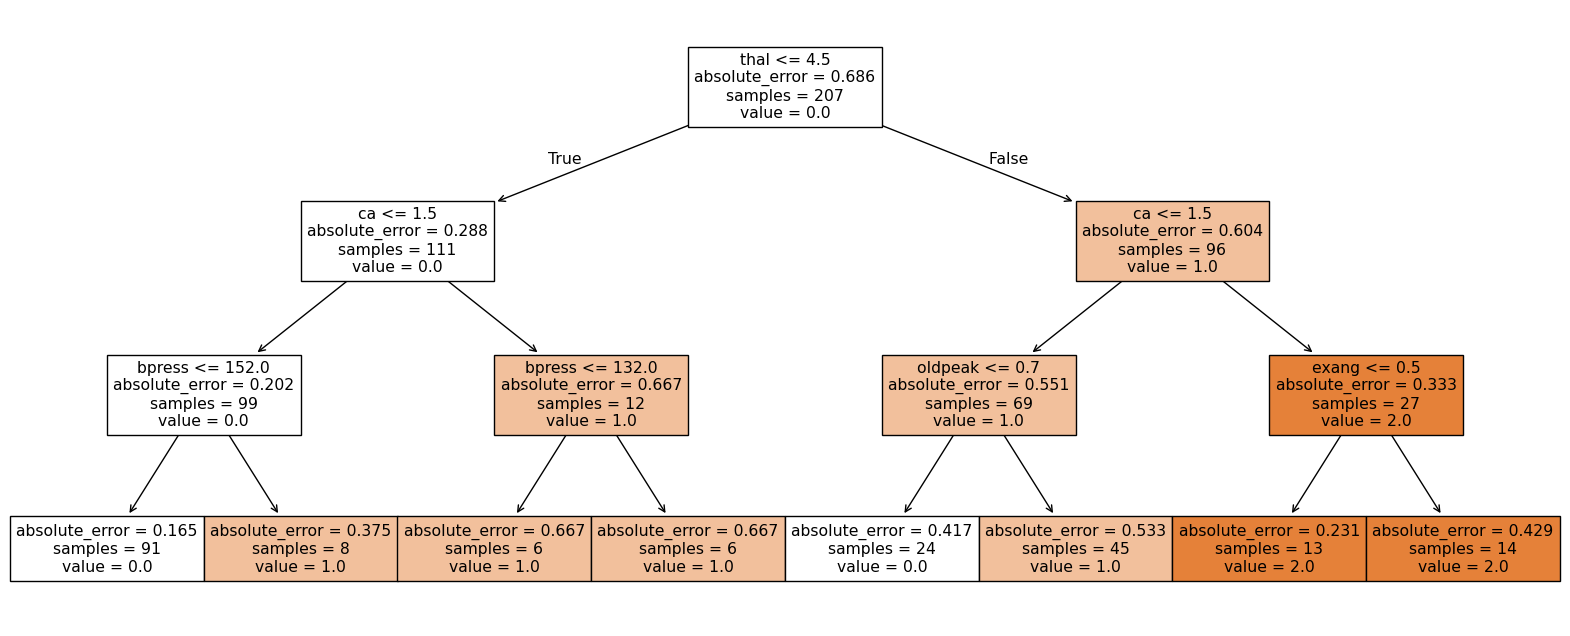

In [45]:

X = df_model.drop(['target', 'Target_Bins', 'target_bins'], axis=1)
fn= X.columns
cn=['0','1','2']

fig = plt.figure(figsize=(20,8))
_ = tree.plot_tree(se_abserr_RT, feature_names = fn, filled=True)

In [46]:
se_sqerr2_RT =DecisionTreeRegressor(criterion='squared_error', random_state=100, max_depth = 4, min_samples_leaf= int(len(X_train_rt)*0.03))
se_sqerr2_RT = se_sqerr2_RT.fit(X_train_rt, y_train_rt)

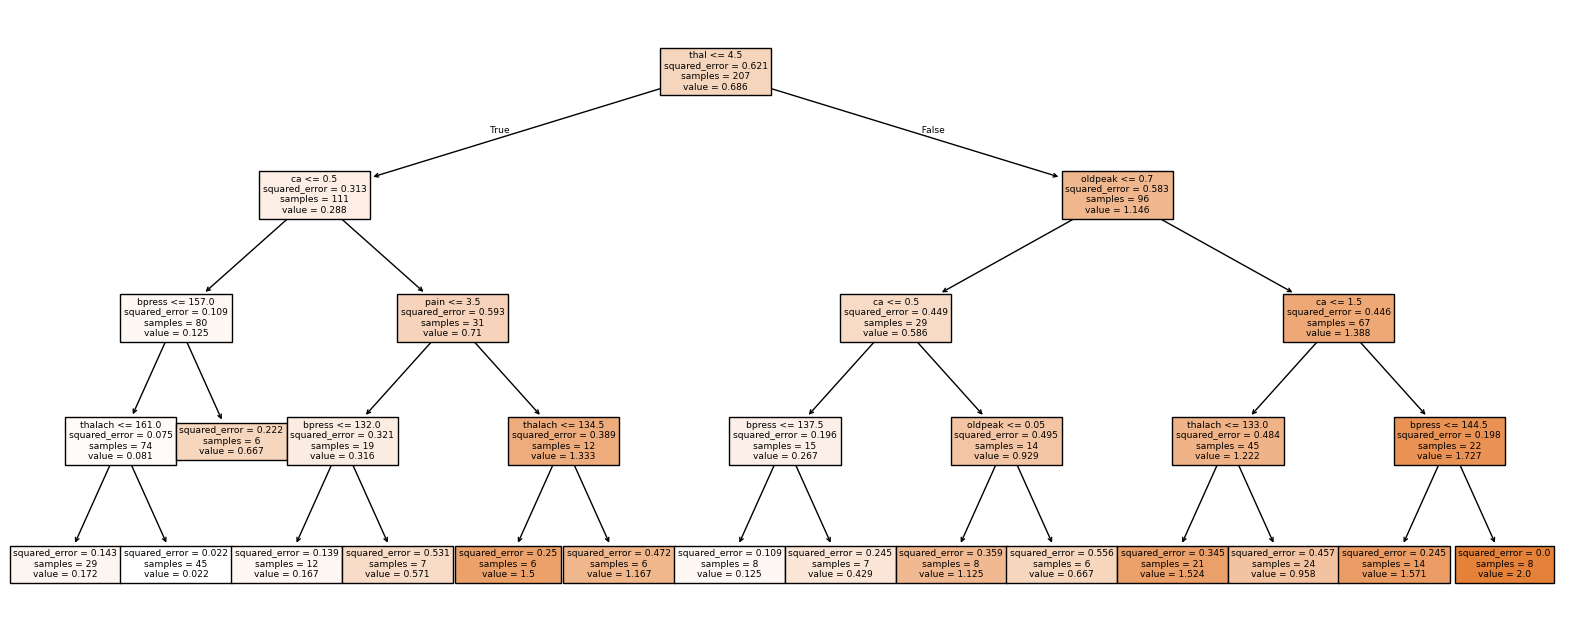

In [47]:
X = df_model.drop(['target', 'Target_Bins', 'target_bins'], axis=1)
fn= X.columns
cn=['0','1','2']

fig = plt.figure(figsize=(20,8))
_ = tree.plot_tree(se_sqerr2_RT, feature_names = fn, filled=True)

In [48]:
se_abserr2_RT =DecisionTreeRegressor(criterion='absolute_error', random_state=100, max_depth = 4, min_samples_leaf= int(len(X_train_rt)*0.03))
se_abserr2_RT = se_abserr2_RT.fit(X_train_rt, y_train_rt)

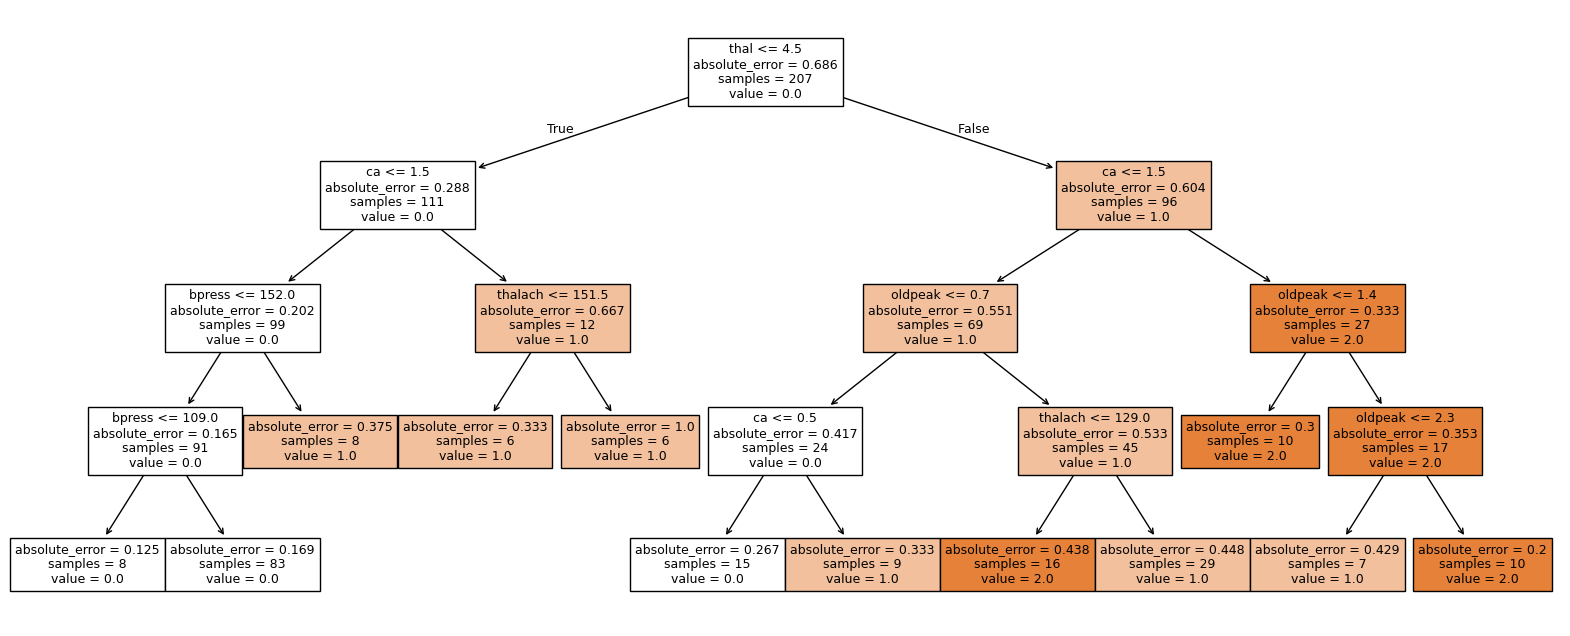

In [49]:
X = df_model.drop(['target', 'Target_Bins', 'target_bins'], axis=1)
fn= X.columns
cn=['0','1','2']

fig = plt.figure(figsize=(20,8))
_ = tree.plot_tree(se_abserr2_RT, feature_names = fn, filled=True)

## Evaluation of Regression Tree based on Accuracy and Stability

# Finding Accuracy using R-squared formula

In [50]:
r2_train_sqer1_rt = se_sqerr_RT.score(X_train_rt, y_train_rt)
r2_test_sqer1_rt = se_sqerr_RT.score(X_test_rt, y_test_rt)
print('R(sqr) of Decision tree Regressor on training set: {:.3f}'. format(r2_train_sqer1_rt))
print('R(sqr) of Decision tree Regressor on test set: {:.3f}'. format(r2_test_sqer1_rt))

R(sqr) of Decision tree Regressor on training set: 0.583
R(sqr) of Decision tree Regressor on test set: 0.210


In [51]:
r2_train_abserr1_rt = se_abserr_RT.score(X_train_rt, y_train_rt)
r2_test_abserr1_rt = se_abserr_RT.score(X_test_rt, y_test_rt)
print('R(sqr) of Decision tree Regressor on training set: {:.3f}'. format(r2_train_abserr1_rt))
print('R(sqr) of Decision tree Regressor on test set: {:.3f}'. format(r2_test_abserr1_rt))

R(sqr) of Decision tree Regressor on training set: 0.417
R(sqr) of Decision tree Regressor on test set: -0.277


In [52]:
r2_train_sqer2_rt = se_sqerr2_RT.score(X_train_rt, y_train_rt)
r2_test_sqer2_rt = se_sqerr2_RT.score(X_test_rt, y_test_rt)
print('R(sqr) of Decision tree Regressor on training set: {:.3f}'. format(r2_train_sqer2_rt))
print('R(sqr) of Decision tree Regressor on test set: {:.3f}'. format(r2_test_sqer2_rt))

R(sqr) of Decision tree Regressor on training set: 0.638
R(sqr) of Decision tree Regressor on test set: 0.227


In [53]:
r2_train_abserr2_rt = se_abserr2_RT.score(X_train_rt, y_train_rt)
r2_test_abserr2_rt = se_abserr2_RT.score(X_test_rt, y_test_rt)
print('R(sqr) of Decision tree Regressor on training set: {:.3f}'. format(r2_train_abserr2_rt))
print('R(sqr) of Decision tree Regressor on test set: {:.3f}'. format(r2_test_abserr2_rt))

R(sqr) of Decision tree Regressor on training set: 0.463
R(sqr) of Decision tree Regressor on test set: -0.190


## Stability Score for each RT

In [54]:
Stability_RT1 = min([(r2_train_sqer1_rt/r2_test_sqer1_rt),(r2_test_sqer1_rt/r2_train_sqer1_rt)])
n_leavs = se_sqerr_RT.get_n_leaves()
print(n_leavs, Stability_RT1)

8 0.35974274579129434


In [55]:
Stability_RT2 = min([(r2_train_abserr1_rt/r2_test_abserr1_rt),(r2_test_abserr1_rt/r2_train_abserr1_rt)])
n_leavs = se_abserr_RT.get_n_leaves()
print(n_leavs, Stability_RT2)

8 -1.5044653669897503


In [56]:
Stability_RT3 = min([(r2_train_sqer2_rt/r2_test_sqer2_rt),(r2_test_sqer2_rt/r2_train_sqer2_rt)])
n_leavs = se_sqerr2_RT.get_n_leaves()
print(n_leavs, Stability_RT3)

15 0.35526194964171814


In [57]:
Stability_RT4 = min([(r2_train_abserr2_rt/r2_test_abserr2_rt),(r2_test_abserr2_rt/r2_train_abserr2_rt)])
n_leavs = se_abserr2_RT.get_n_leaves()
print(n_leavs, Stability_RT4)

12 -2.439777402758335


## **Overall score using the accuracy, stability and simlicity score**

In [58]:
if r2_train_sqer1_rt > 0.15:
  accuracy_weight_sqerr1_rt = r2_train_sqer1_rt * 0.55
else:
  accuracy_weight_sqerr1_rt = 0
simplicity_weight_sqerr1_rt= 1 * 0.25
stability_weight_sqerr1 = 0
Overall_score_sqerr1 =  accuracy_weight_sqerr1_rt + simplicity_weight_sqerr1_rt + stability_weight_sqerr1
print(Overall_score_sqerr1)

0.5706485993995536


In [59]:
if r2_train_abserr1_rt > 0.15:
  accuracy_weight_abserr1_rt = r2_train_abserr1_rt * 0.55
else:
  accuracy_weight_abserr1_rt = 0
simplicity_weight_abserr1_rt= 1 * 0.25
stability_weight_abserr1 =0
Overall_score_abserr1 =  accuracy_weight_abserr1_rt + simplicity_weight_abserr1_rt + stability_weight_abserr1
print(Overall_score_abserr1)

0.47921143587046366


In [60]:
if r2_train_sqer2_rt > 0.15:
  accuracy_weight_sqer2_rt = r2_train_sqer2_rt * 0.55
else:
  accuracy_weight_sqer2_rt = 0
simplicity_weight_sqer2_rt= 0
stability_weight_sqer2 = 0
Overall_score_sqer2 =  accuracy_weight_sqer2_rt + simplicity_weight_sqer2_rt + stability_weight_sqer2
print(Overall_score_sqer2)

0.3507434797723827


In [61]:
if (r2_train_abserr2_rt ) > 0.15:
  accuracy_weight_abserr2_rt = r2_train_abserr2_rt * 0.55
else:
  accuracy_weight_abserr2_rt = 0
simplicity_weight_abserr2_rt= 0
stability_weight_abserr2 = 0
Overall_score_abserr2 =  accuracy_weight_abserr2_rt + simplicity_weight_abserr2_rt + stability_weight_abserr2
print(Overall_score_abserr2)

0.2548745210008265
